# Visualization basics with Matplotlib, Pandas and Seaborn

In this Lab we will use the [Energy Efficiency Dataset](https://archive.ics.uci.edu/ml/datasets/energy+efficiency), the Titanic Dataset and the [Census Income Dataset](http://archive.ics.uci.edu/ml/datasets/Census+Income). The Census Income Dataset and the Energy Efficiency Dataset are both available at the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php). This is a great source of datasets that are already processed and categorized. We will perform an exploratory data analysis using the some of the most common visualization tools available in Matplotlib, Pandas and Seaborn.


# Getting Started:

## Importing the libraries needed for this Lab

In [1]:
%matplotlib inline
import os
import requests
import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Demo:

# Pandas' Visualization Tools

## Obtaining the Energy Efficiency Dataset

### Using the [requests](https://realpython.com/python-requests/) library to fetch all our data:

In [2]:
ENERGY = ("http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx",)

def download_data(urls, path='data'):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        response = requests.get(url)
        name = os.path.basename(url)
        with open(os.path.join(path, name), 'wb') as f:
            f.write(response.content)

In [3]:
download_data(ENERGY)

## Exploratory Data Analysis (EDA)



Pandas, which you've already been experimenting with so far this semester, is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for Python programmers and data scientists.

### Load data into a dataframe:

Here We will use the [pd.read_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) method to read Excel files. This method uses the 'xlrd' library, make sure it is installed in your working environment.


In [4]:
energy   = pd.read_excel('data/ENB2012_data.xlsx', sep=",") 

In [5]:
energy.head() 

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
# As we can see above, the dataset does not contain labels. We will create them now.

energy.columns = ['compactness','surface_area','wall_area','roof_area','height',\
                  'orientation','glazing_area','distribution','heating_load','cooling_load']
energy.head() 

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Summary statistics:

In [7]:
energy.describe()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Pandas' Visualization Tools:

Pandas has a bunch of really useful [visualization tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). (Hint: They're all Matplotlib under the hood. Most Python viz libraries are wrappers for Matplotlib!)

In [8]:
# We can use the fivethirtyeight style with Matplotlib, which is a little bit nicer-looking than the standard style.
matplotlib.style.use('fivethirtyeight')

#### Making an area plot:

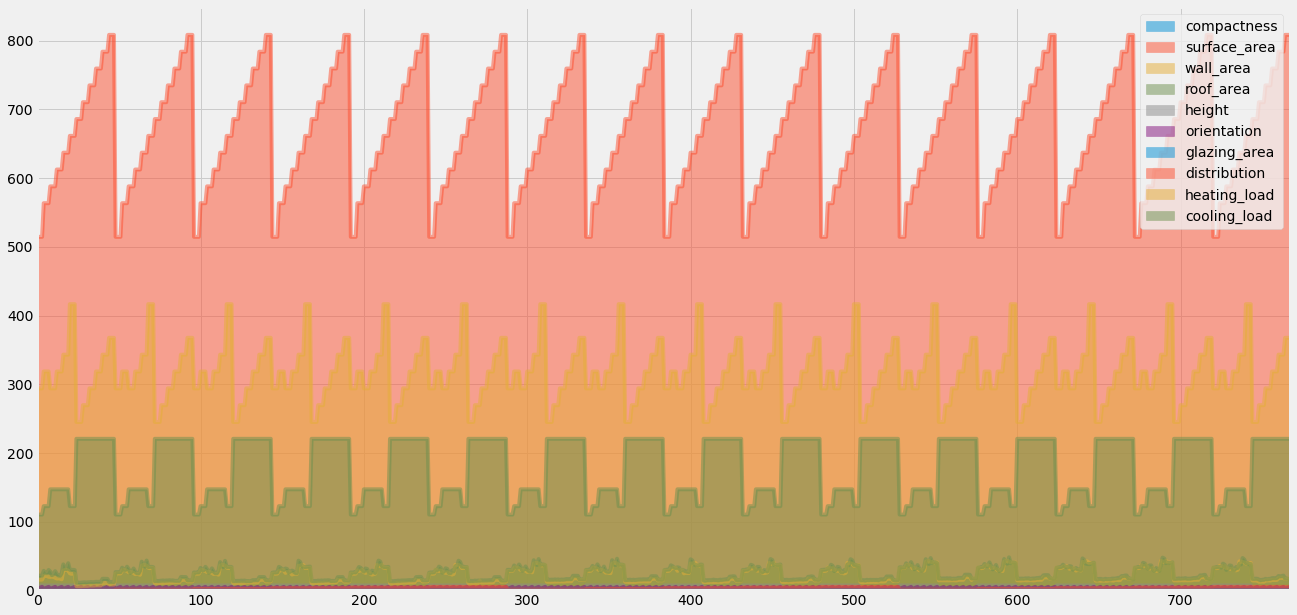

In [9]:
energy.plot(kind='area', stacked=False,figsize=[20,10])

#### Making scatter plots:

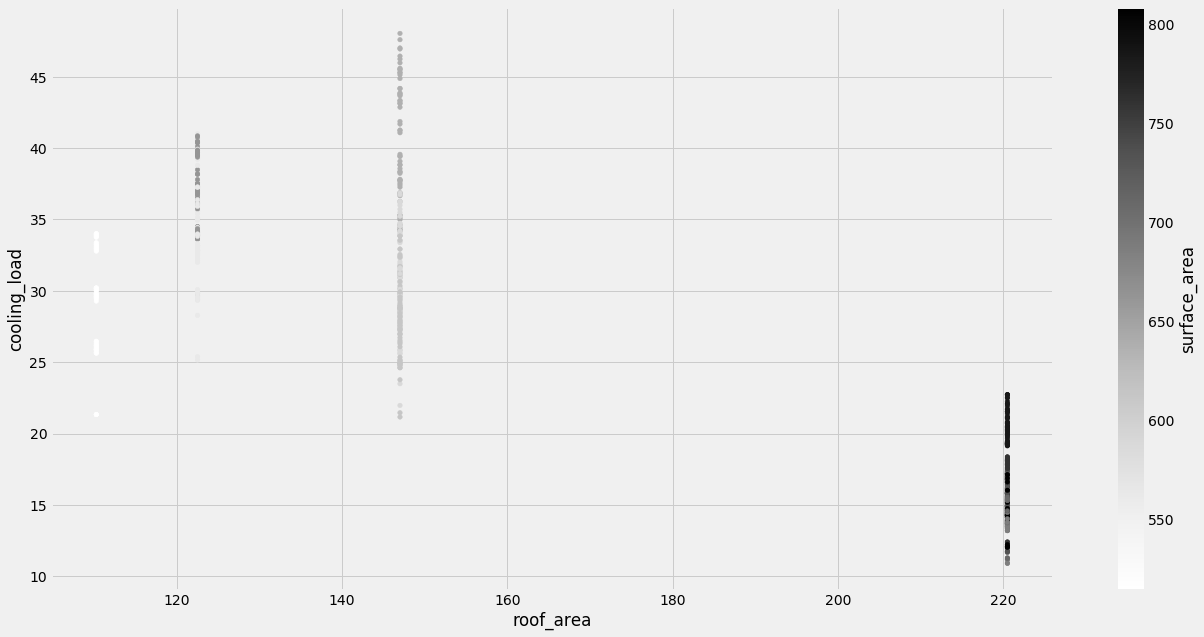

In [10]:
energy.plot(kind='scatter', x='roof_area', y='cooling_load', c='surface_area',figsize=[20,10])

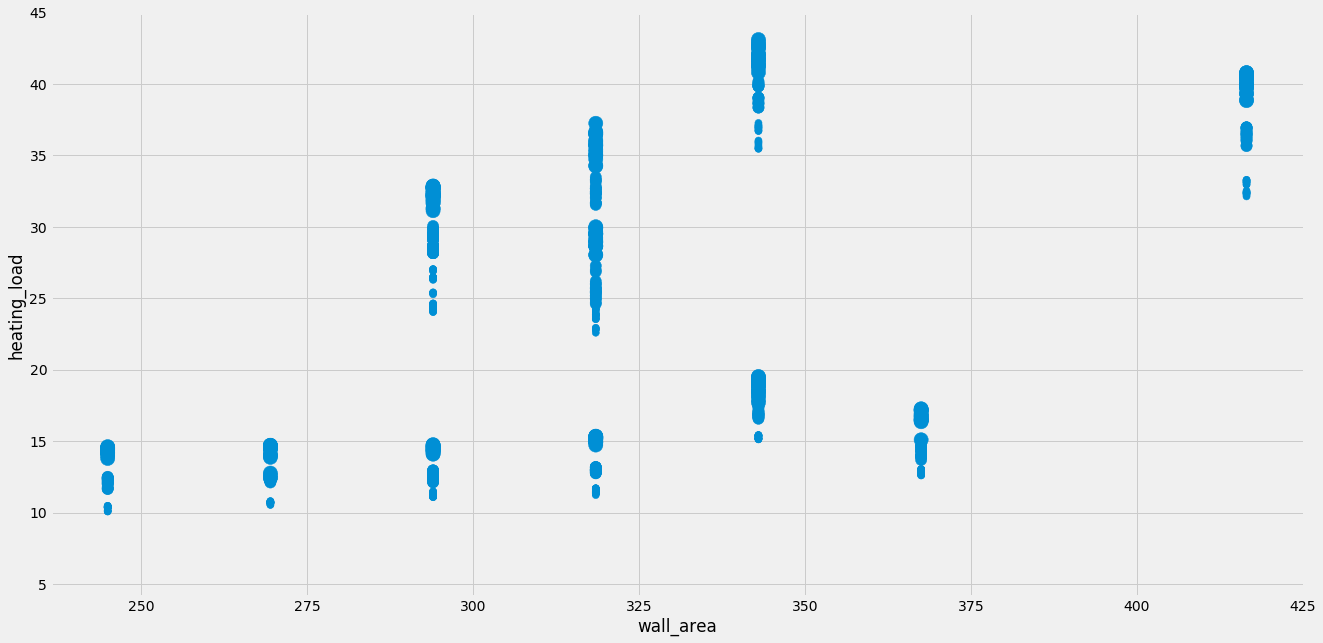

In [11]:
energy.plot(kind='scatter', x='wall_area', y='heating_load', s=energy['glazing_area']*500,figsize=[20,10])

#### Making a box plot:

In [12]:
matplotlib.style.use('ggplot')

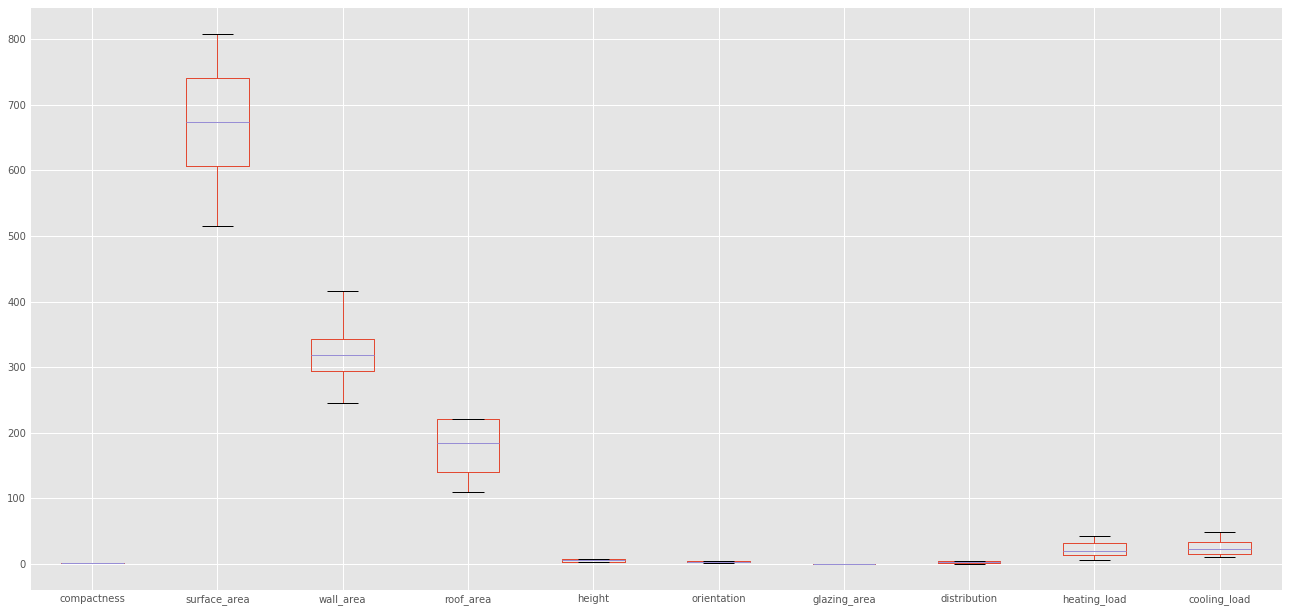

In [13]:
energy.plot(kind='box',figsize=(20,10))

#### Making a histogram:

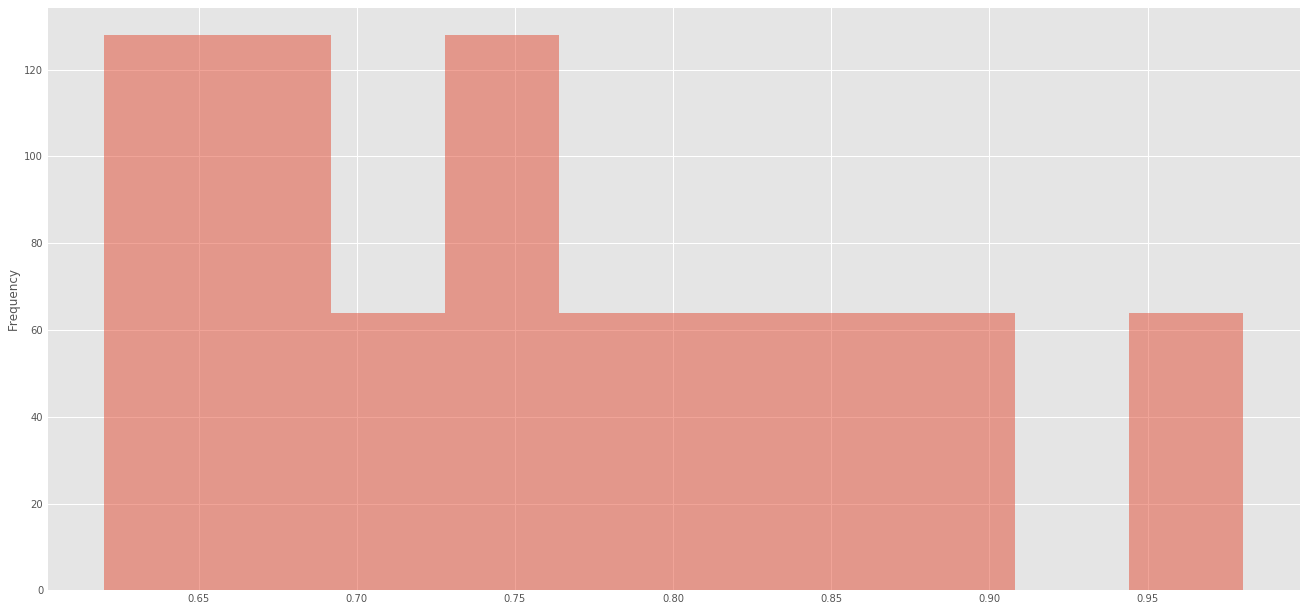

In [14]:
energy['compactness'].plot(kind='hist', alpha=0.5, figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118f21128>,
      dtype=object)

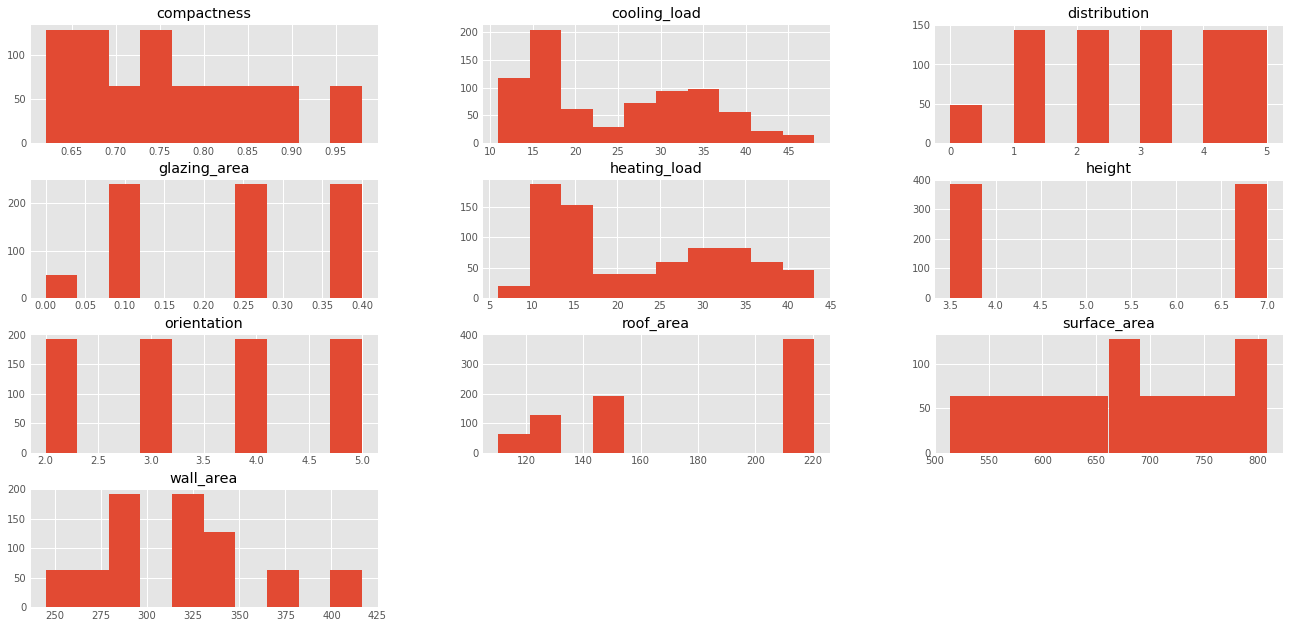

In [15]:
energy.hist(figsize=(20,10)) # Histogram for all features

#### Visualizing the distribution with a kernel density estimate:

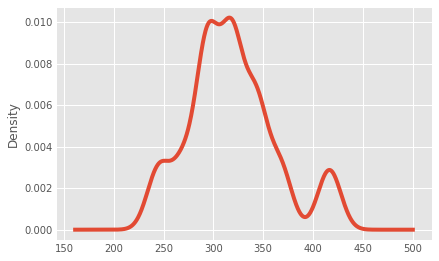

In [16]:
energy['wall_area'].plot(kind='kde')

#### Making a scatter plot matrix:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ba23b70>,
      dtype=object)

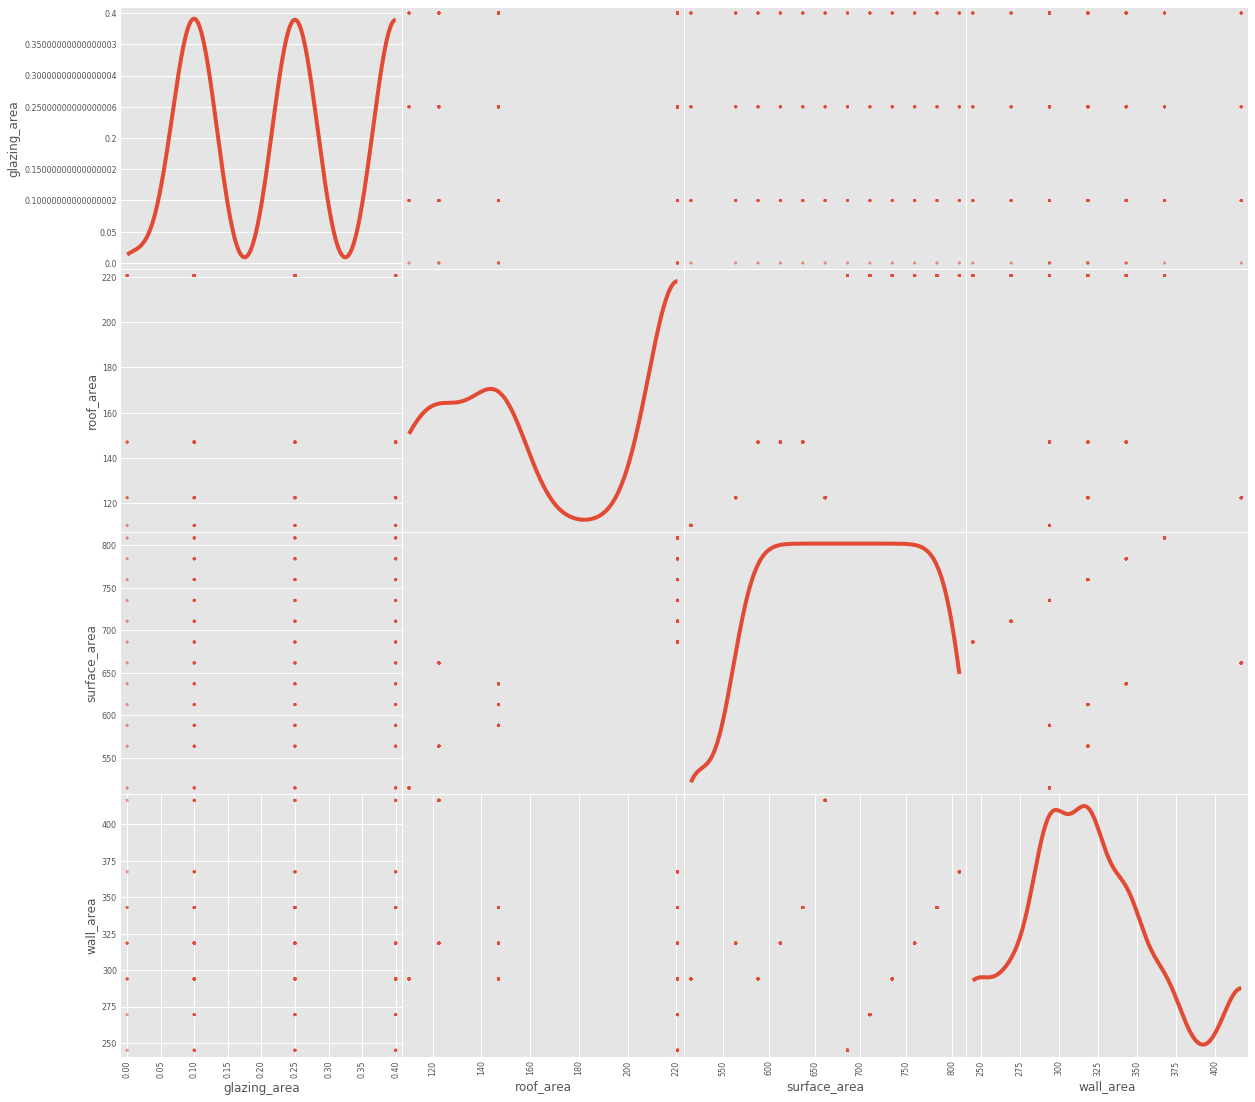

In [17]:
areas = energy[['glazing_area','roof_area','surface_area','wall_area']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')

### Don't forget about Matplotlib...

Sometimes you'll want to something a bit more custom (or you'll want to figure out how to tweak the labels, change the colors, make small multiples, etc), so you'll want to go straight to the Matplotlib documentation.
You will learn more about matplotlib.pyplot on the next Lab.

#### Tweak the labels
For example, say we want to tweak the labels on one of our graphs:

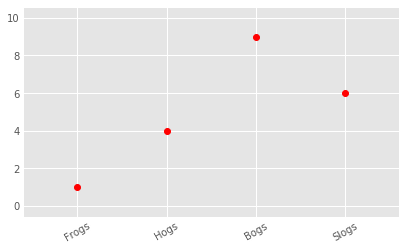

In [18]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation=30)
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()


# Seaborn

##  Obtaining the Data For the Census Dataset

### Exploratory Data Analysis (EDA)



[Seaborn](https://seaborn.pydata.org/) is another great Python visualization library to have up your sleeve.

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. For a brief introduction to the ideas behind the package, you can read the introductory notes. More practical information is on the installation page. You may also want to browse the example gallery to get a sense for what you can do with seaborn and then check out the tutorial and API reference to find out how.

Seaborn has a lot of the same methods as Pandas, like [boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=box%2520plot#seaborn.boxplot) and [histograms](http://seaborn.pydata.org/generated/seaborn.distplot.html) (albeit with slightly different syntax!), but also comes with some novel tools

We will now use the census dataset to explore the use of visualizations in feature analysis and selection using this library.

### Using the [requests](https://realpython.com/python-requests/) library to fetch all our data:

We are using the same download_data() function that we created to get the Energy Efficiency Dataset

In [19]:
CENSUS_DATASET = (
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
)


download_data(CENSUS_DATASET, path = 'census')

#### Read our data and load it into a dataframe:

After our data is stored, we will use the [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read our file. The 'data' folder contains 2 files: the adult.data (csv file separated by commas) and the adult.names that contains the name of the columns.

In [20]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]


data = pd.read_csv('census/adult.data', sep=",", names=names, engine = 'python') 
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Making a Countplot:

In this dataset, our target variable is data['income'] which is categorical. It would be interesting to see the frequencies of each class, relative to the target of our classifier. To do this, we can use the countplot function from the Python visualization package Seaborn to count the occurrences of each data point. Let's take a look at the counts of different categories in data['occupation'] and in data['education'] — two likely predictors of income in the Census data:

The [Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function accepts either an x or a y argument to specify if this is a bar plot or a column plot. We chose to use the y argument so that the labels would be readable. The hue argument specifies a column for comparison; in this case we're concerned with the relationship of our categorical variables to the target income. Go ahead and explore other variables in the dataset, for example data.race and data.sex to see if those values are predictive of the level of income or not!

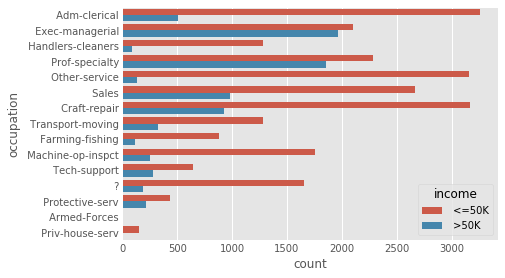

In [21]:
ax = sns.countplot(y='occupation', hue='income', data=data,)


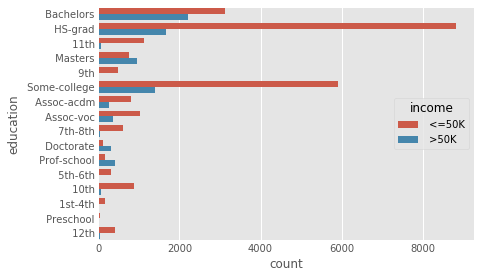

In [22]:
ax = sns.countplot(y='education', hue='income', data=data,)

#### Making a Boxplot:


Next, you can start using some more advanced visual analysis tools to explore multiple features simultaneously to see if they are related to each other. For example, it would be useful to know if years of education correlates equally well with income for people of all races. When we use a faceted boxplot graph to disaggregate by race, we can see that more years of education does not result in the same gains in income for Asian Americans/Pacific Islanders and Native Americans compared with Caucasians:

/Users/franco/anaconda3/envs/ta/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


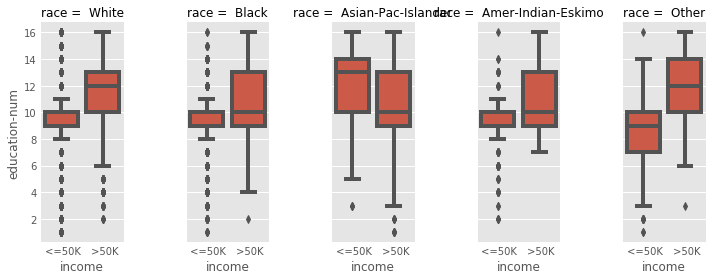

In [23]:
g = sns.FacetGrid(data, col='race', height=4, aspect=.5)
g = g.map(sns.boxplot, 'income', 'education-num')

Or let's say we wanted to see how years of education correlates with income for men and for women:


/Users/franco/anaconda3/envs/ta/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


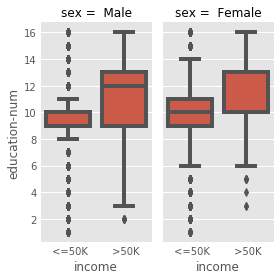

In [24]:
g = sns.FacetGrid(data, col='sex', height=4, aspect=.5)
g = g.map(sns.boxplot, 'income', 'education-num')


The plot above shows us that more education also does not result in the same gains in income for women compared with men.

Since age seems like a likely predictor of income level, it would be useful to know if age is equally predictive for all people. We can use small multiple plots to see how age correlates with income, disaggregated by race:


/Users/franco/anaconda3/envs/ta/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


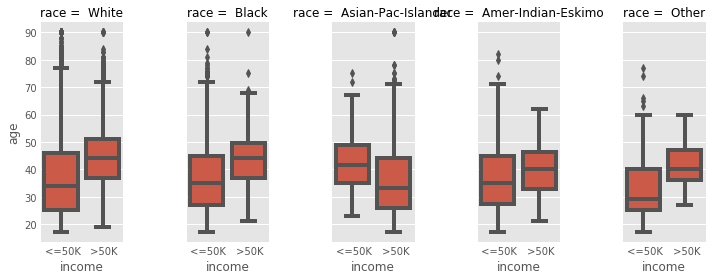

In [25]:
g = sns.FacetGrid(data, col='race', height=4, aspect=.5)
g = g.map(sns.boxplot, 'income', 'age')

#### Making a Violin Plot: 

[Violinplots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html?highlight=violinplots) are often a useful alternative to box-and-whisker plots because they can integrate the information from a traditional boxplot with a kernel density estimate. For example, the two plots below enable us to see the distribution of years of education, hours worked per week, and age for men and women with annual incomes both above and below $50,000

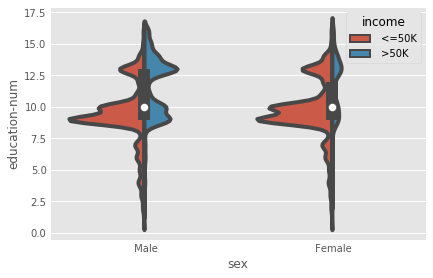

In [26]:
sns.violinplot(x='sex', y='education-num', hue='income', data=data, split=True, scale='count')

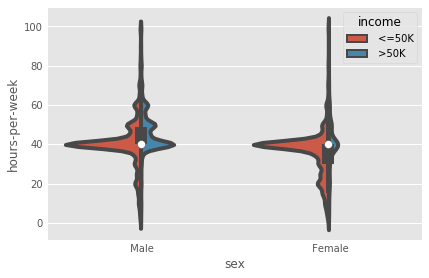

In [27]:
sns.violinplot(x='sex', y='hours-per-week', hue='income', data=data, split=True, scale='count')


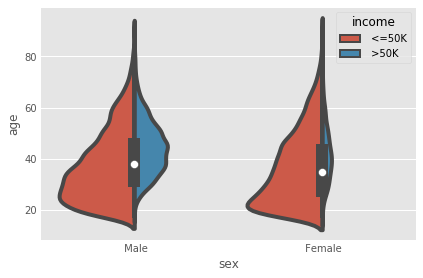

In [28]:
sns.violinplot(x='sex', y='age', hue='income', data=data, split=True, scale='count')

#### Making a Catplot:

[Catplot]() gives us an easy method to explore some of the categorical data as well. Catplots allow us to look at a parameter's distribution defined by another parameter.



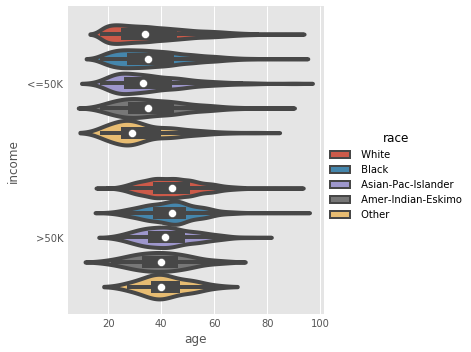

In [29]:
g = sns.catplot(x="age", y="income", hue="race",
                data=data, kind="violin")

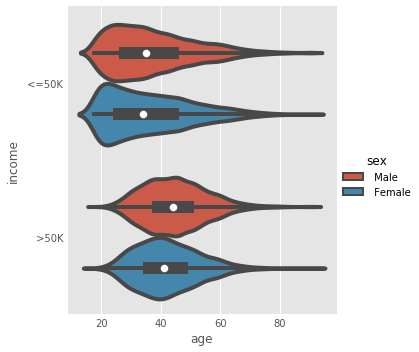

In [30]:
g = sns.catplot(x="age", y="income", hue="sex",
                data=data, kind="violin")

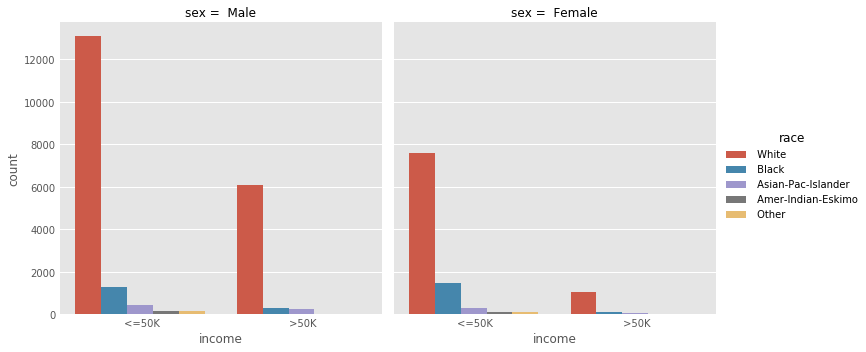

In [31]:
g = sns.catplot("income", hue="race",
                 col="sex", data=data, kind = 'count')

#### Tools for visualizing linear relationships

See more: https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html

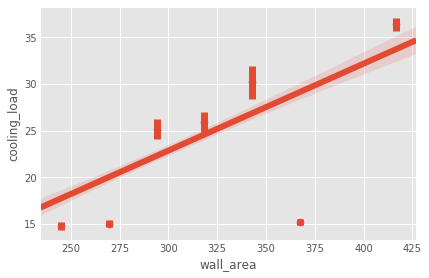

In [32]:
sns.regplot(x='wall_area', y='cooling_load', data=energy, x_estimator=np.mean)

#### FacetGrids for Small Multiples

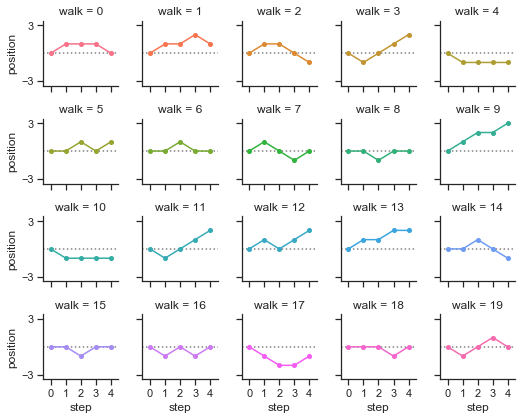

In [33]:
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

#### Heatmaps 
If you have time series data

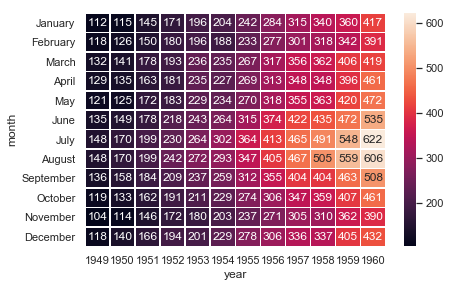

In [34]:
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset('flights')
flights = flights_long.pivot('month', 'year', 'passengers')

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt='d', linewidths=.5)

### Rank-by-feature

To visualize the correlation matrix for your features

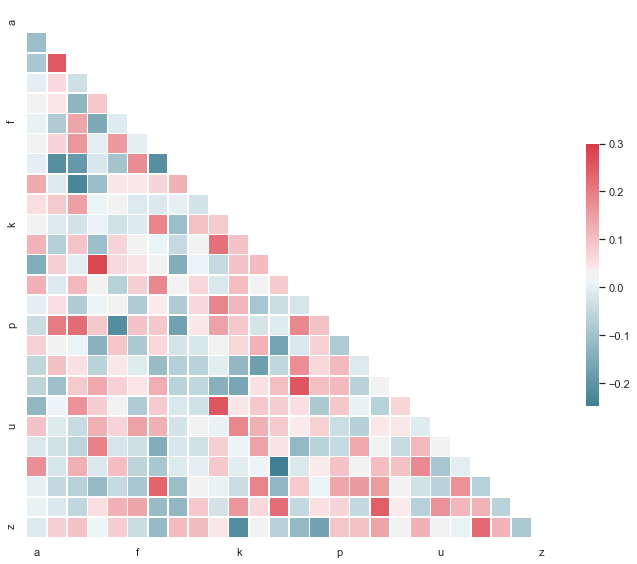

In [35]:
from string import ascii_letters as letters
sns.set(style="white")
 
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(letters[:26]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Lab:


In this lab, we will use a familiar dataset to explore the use of visualizations in feature analysis and selection.


The objective of this lab is to work through some of the visualization capabilities available in Seaborn. For a more thorough investigation of the capabilities offered by Seaborn, you are encouraged to do the full tutorial linked below. Seaborn is an API to matplotlib. It integrates with pandas dataframes, simplifying the process of visualizing data. It provides simple functions for plotting.

Some of the features that seaborn offers are

* Several built-in themes that improve on the default matplotlib aesthetics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
* Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
* Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
* A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
* High-level abstractions for structuring grids of plots that let you easily build complex visualizations

We are going to work with look at 3 useful functions in seaborn: catplot, pairplot, and joinplot. In addition, you will try to create your own plots using pandas, and seaborn.

** Before running the code in this lab, articulate to your partner what you expect the visualization to look like. Look at the code and the Seaborn documentation to figure out what data is being plotted and what the type of plot may look like.**

sources:

Previous Titanic work: https://github.com/georgetown-analytics/XBUS-503-01.Data_Ingestion_and_Wrangling/tree/master/titanic

Seaborn Tutorial: http://seaborn.pydata.org/tutorial.html


In [36]:
pd.set_option('display.max_columns', 500)

Like scikit-learn, Seaborn has "toy" datasets available to import for exploration. This includes the Titanic data we have previously looked at. Let's load the Seaborn Titanic dataset and take a look.

(https://github.com/mwaskom/seaborn-data shows the datasets available to load via this method in Seaborn.)

Read [this](https://stackoverflow.com/questions/42098126/mac-osx-python-ssl-sslerror-ssl-certificate-verify-failed-certificate-verify) if you're running Python3.6 and get an SSL error.

In [37]:
df = sns.load_dataset('titanic')

In [38]:
# Write the code to look at the head of the dataframe
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


As you can see, the data has been cleaned up a bit.

We performed some rudimentary visualization for exploratory data analysis previously. For example, we created a histogram using matplotlib to look at the age distirbution of passengers.

/Users/franco/anaconda3/envs/ta/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/franco/anaconda3/envs/ta/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


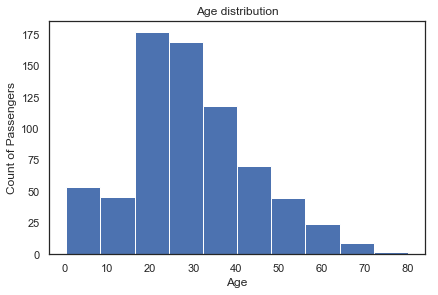

In [39]:
# Create a histogram to examine age distribution of the passengers.

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['age'], bins = 10, range = (df['age'].min(),df['age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

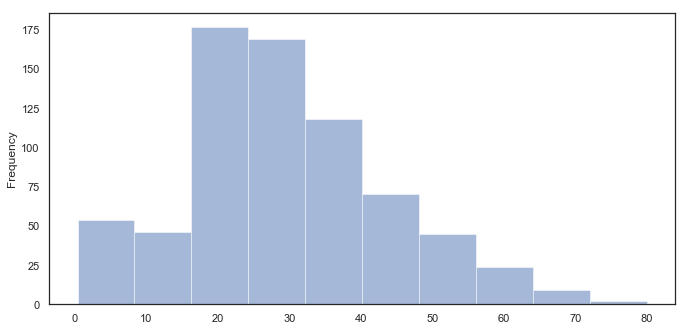

In [40]:
# Create a histogram to examine age distribution of the passengers using pandas. 

df['age'].plot(kind='hist', alpha=0.5, figsize=(10,5))

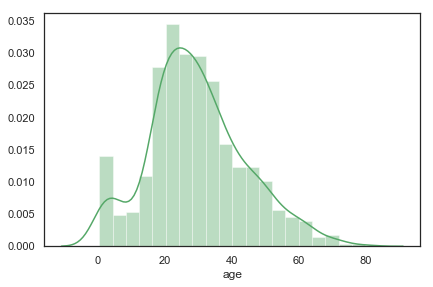

In [41]:
# Create a distplot to examine age distribution of the passengers using seaborn.
# distplot is a histogram with a kernel density plot

age = df['age'].dropna()
ax = sns.distplot(age, color = 'g')

### Catplot

Our prior work with the Titanic data focused on the available numeric data. Catplot gives us an easy method to explore some of the categorical data as well. Catplots allow us to look at a parameter's distribution in bins defined by another parameter.

For example, we can look at the survival rate based on the deck a passenger's cabin was on.

**Remember**: take a look at the documentation first (https://stanford.edu/~mwaskom/software/seaborn/index.html) and figure out what the code is doing. Being able to understand documentation will help you a lot in your projects.

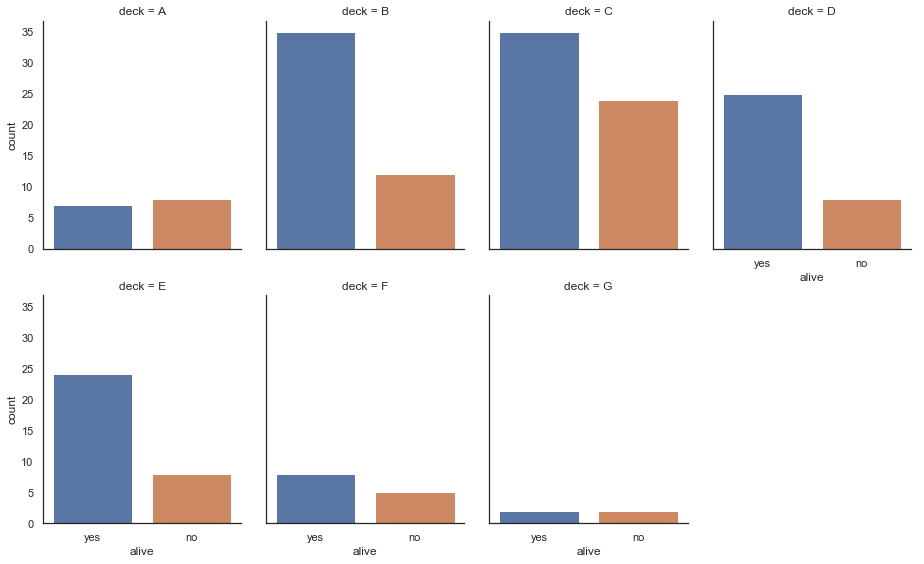

In [42]:
# What is a catplot? Check the documentation! Which data are we using? What is the count a count of?

g = sns.catplot("alive", col="deck", col_wrap=4, 
                   data=df[df['deck'].notnull()], kind="count", height=4, aspect=.8)

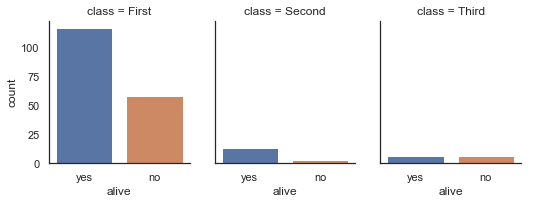

In [43]:
# Try your own variation of the factorplot above.

g = sns.catplot("alive", col="class", col_wrap=4, 
                   data=df[df['deck'].notnull()], kind="count", height=3, aspect=.8)

As you saw in the catplot documentation, you can specify several different types of plots in the parameters. Let's use catorplot to create a nested barplot showing passenger survival based on their class and sex. Fill in the missing pieces of the code below. 

The goal is a barplot showing survival probablility by class that further shows the sex of the passengers in each class. (Hint: how can you use the hue parameter?)

g = sns.catplot(x="CHANGE TO THE CORRECT FEATURE", 
                   y="CHANGE TO THE CORRECT FEATURE", 
                   hue="CHANGE TO THE CORRECT FEATURE", 
                   data=df,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

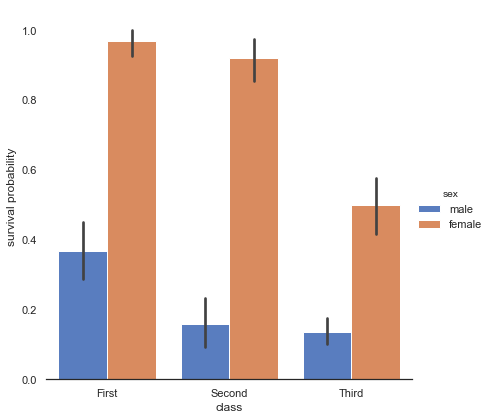

In [44]:
# solution:

g = sns.catplot(x="class", 
                   y="survived", 
                   hue="sex", 
                   data=df,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

Take a look at the code below. Let's again plot passenger survival based on their class and who they were (man, woman, child) but using a different plot for each class, like what we did above for the deck information.

g = sns.catplot(x="CHANGE TO THE CORRECT FEATURE", 
                   y="CHANGE TO THE CORRECT FEATURE", 
                   col="CHANGE TO THE CORRECT FEATURE", 
                   data=df, 
                   saturation=.5, kind="bar", ci=None,aspect=.6)
(g.set_axis_labels("", "Survival Rate").set_xticklabels(["Men", "Women", "Children"]).set_titles
 ("{col_name} {col_var}").set(ylim=(0, 1)).despine(left=True)) 

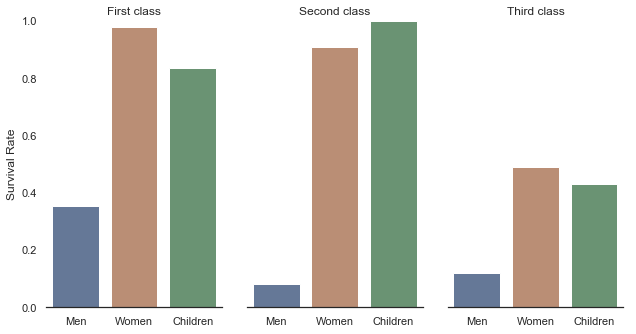

In [45]:
# solution

g = sns.catplot(x="who", 
                   y="survived", 
                   col="class", 
                   data=df, 
                   saturation=.5, kind="bar", ci=None,aspect=.6)
(g.set_axis_labels("", "Survival Rate").set_xticklabels(["Men", "Women", "Children"]).set_titles
 ("{col_name} {col_var}").set(ylim=(0, 1)).despine(left=True)) 

Factorplot has 6 different kinds of plots, we explored two of them above. Using the documentation, try out one of the remaining plot types. A suggestion is provided below. You can follow it, and/or create your own visualization.

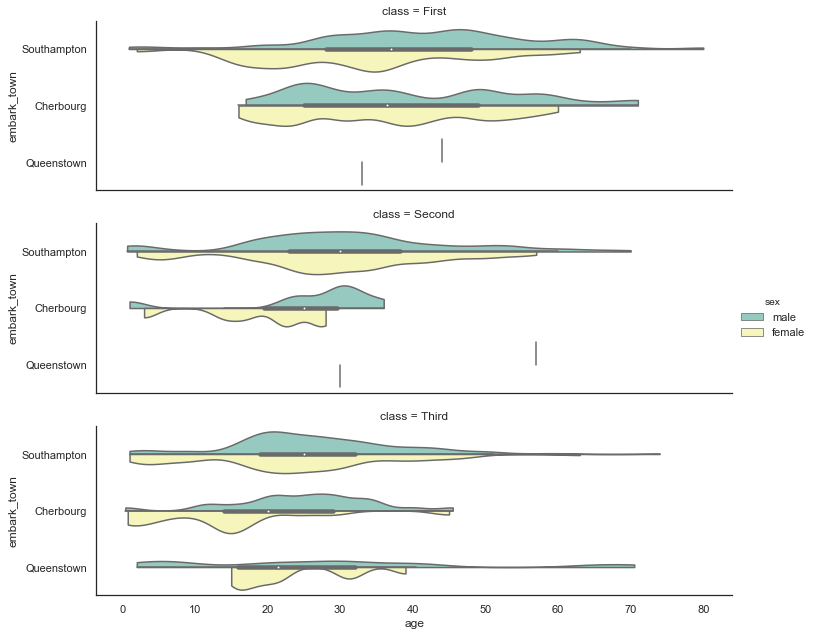

In [46]:
# With factorplot, make a violin plot that shows the age of the passengers at each embarkation point 
# based on their class. Use the hue parameter to show the sex of the passengers

g = sns.catplot(x="age", y="embark_town", hue="sex", row="class", data=df[df['embark_town'].notnull()], orient="h",\
                   height=3, aspect=3.5, palette="Set3", kind="violin", split=True, cut=0, bw=.2)

### Pairplot

In the Wheat Classification notebook, we saw a scatter matrix. A scatter matrix plots each feature against every other feature. The diaganol showed us a density plot of just that data. Seaborn gives us this ability in the pairplot. In order to make a useful pairplot with the data, let's update some information. 

In [47]:
df['age'] = df['age'].fillna(df['age'].mean())

/Users/franco/anaconda3/envs/ta/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/franco/anaconda3/envs/ta/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


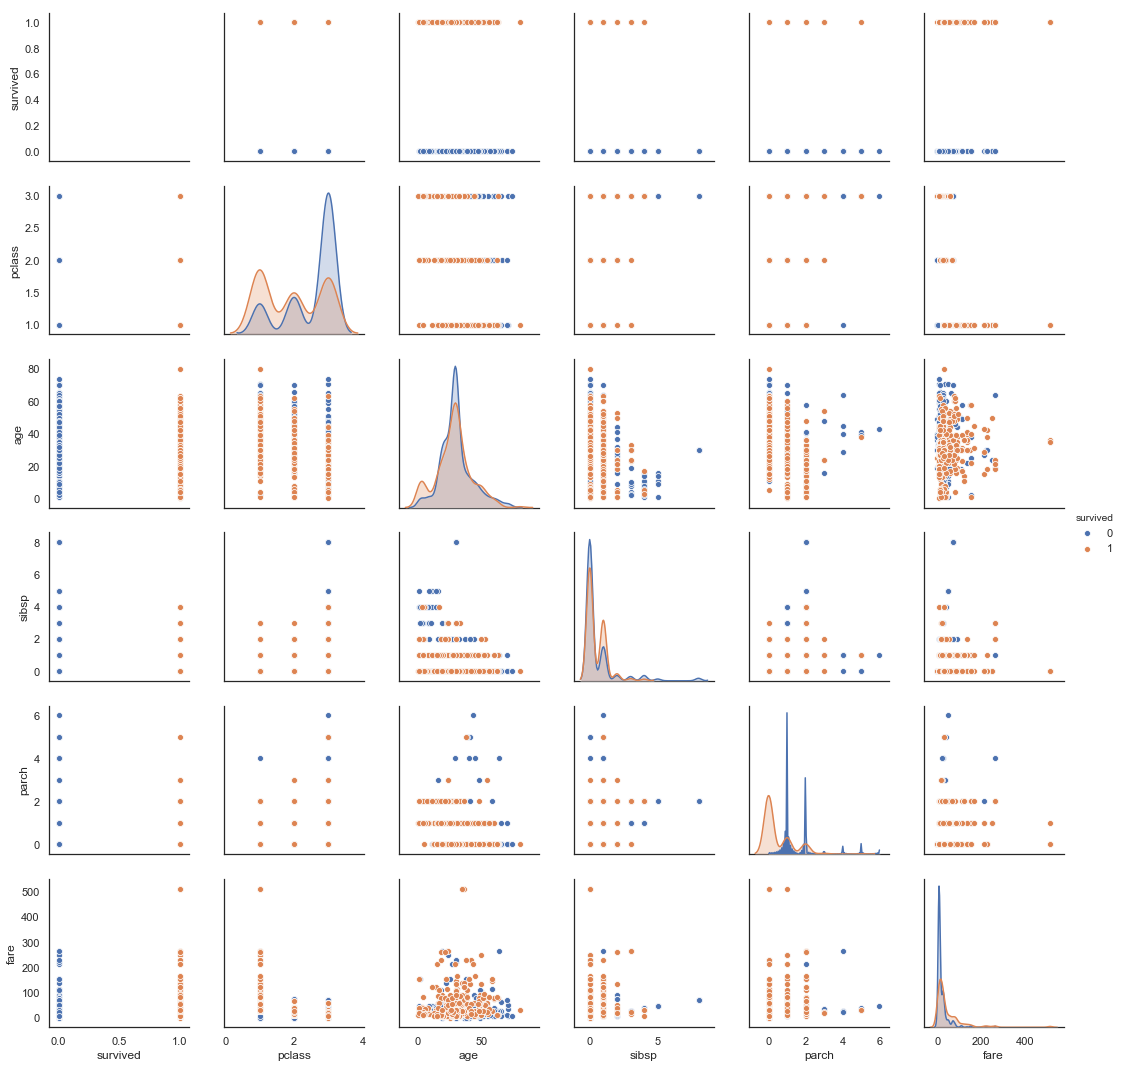

In [48]:
g = sns.pairplot(data=df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']], hue='survived', dropna=True)

The Titanic data gives an idea of what we can see with a pairplot, but it might not be the most illustrative example. Using the information provided so far, make a pairplot using the seaborn car crashes data.

In [49]:
# Pairplot of the crash data
crashes = sns.load_dataset('car_crashes')
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


/Users/franco/anaconda3/envs/ta/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/franco/anaconda3/envs/ta/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


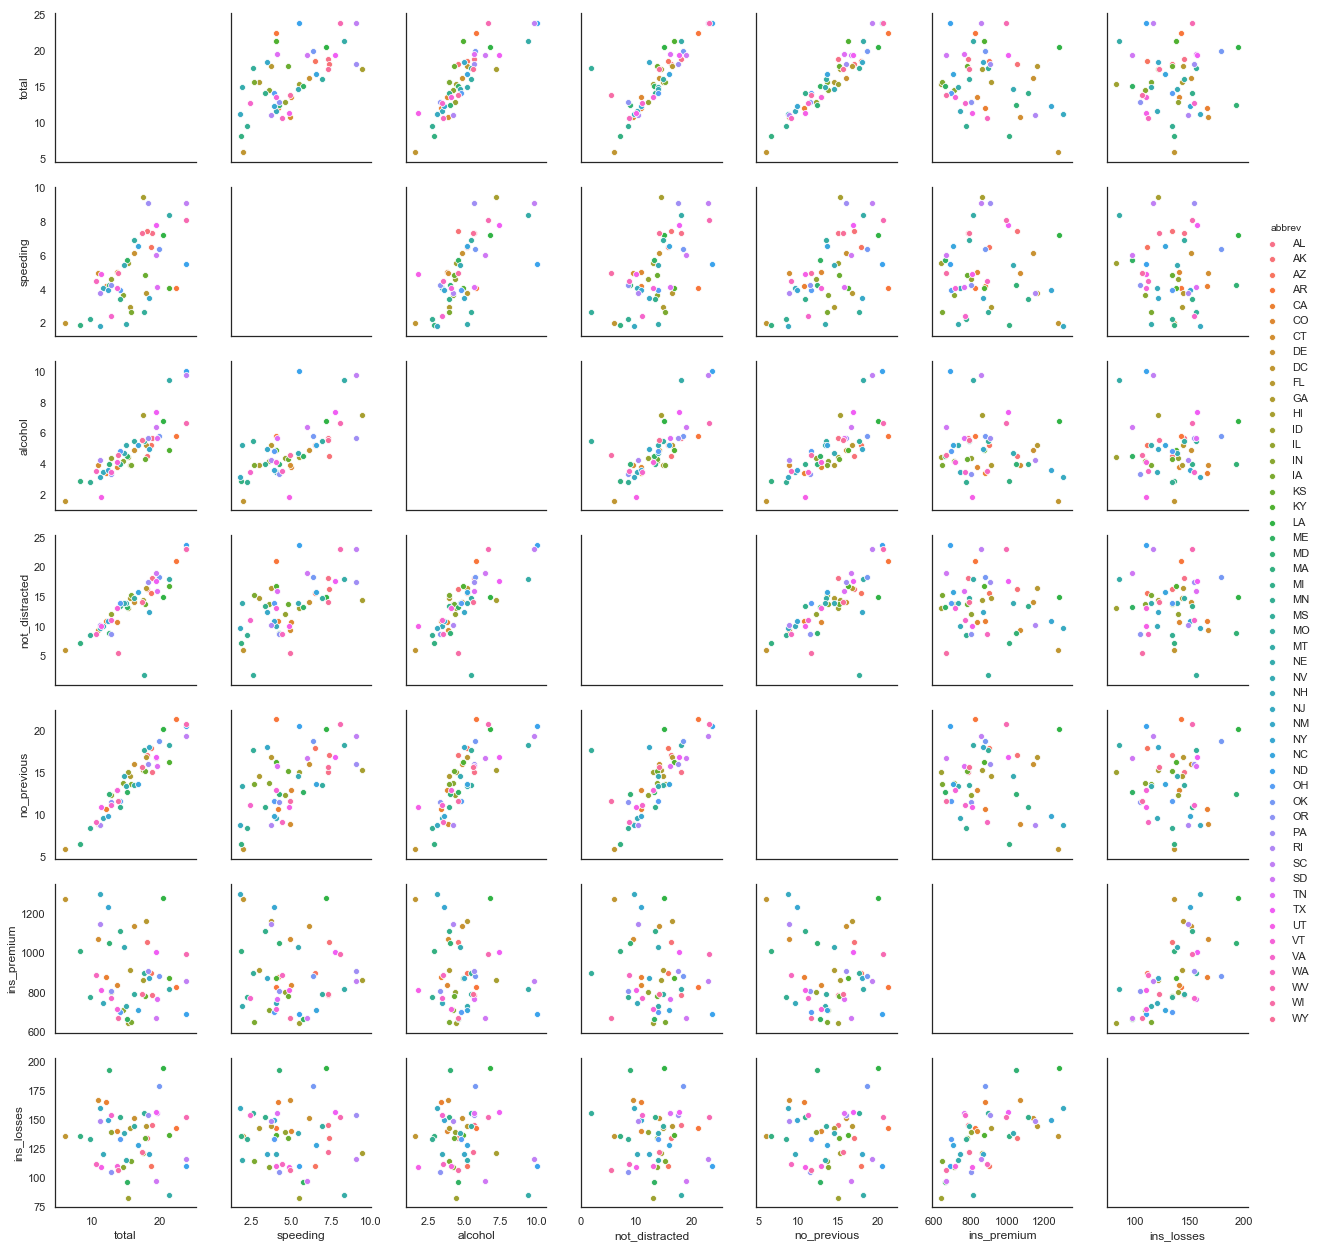

In [50]:
g = sns.pairplot(data=crashes[['abbrev','total', 'speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses']], hue='abbrev', dropna=True)

### Jointplot

Like pairplots, a jointplot shows the distribution between features. It also shows individual distributions of the features being compared.

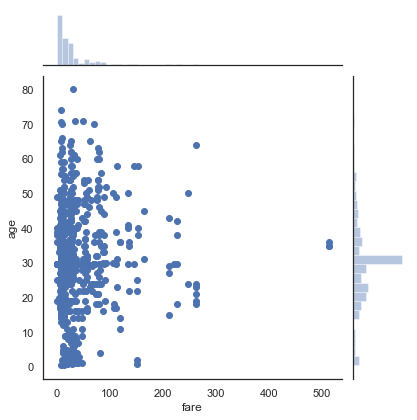

In [51]:
g = sns.jointplot("fare", "age", df)

Using either the Titanic or crash data, create some jointplots.

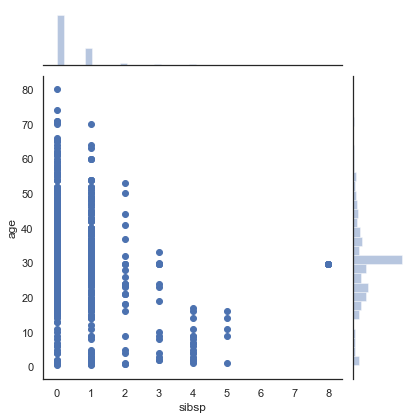

In [52]:
# Jointplot, titanic data

g = sns.jointplot("sibsp", "age", df)

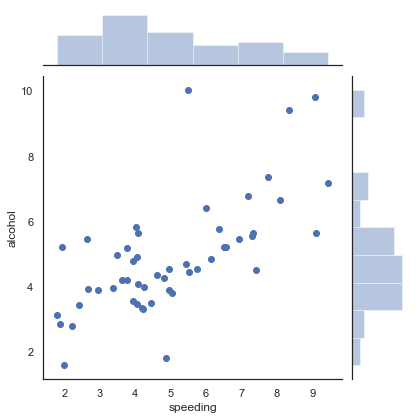

In [53]:
# Jointplot, crash data
g = sns.jointplot("speeding", "alcohol", crashes)

### Bonus
Use the Titanic data to create a boxplot of the age distribution on each deck by class.

### Extra Bonus
Plot the same inforamtion using FacetGrid.

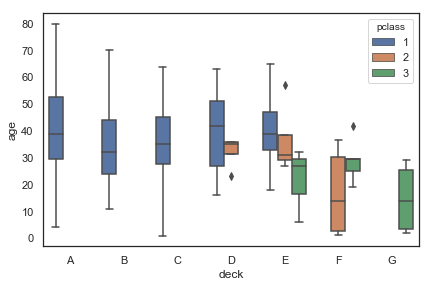

In [54]:
#  boxplot of the age distribution on each deck by class
sns.boxplot(x="deck", y="age", hue="pclass", data=df)

/Users/franco/anaconda3/envs/ta/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


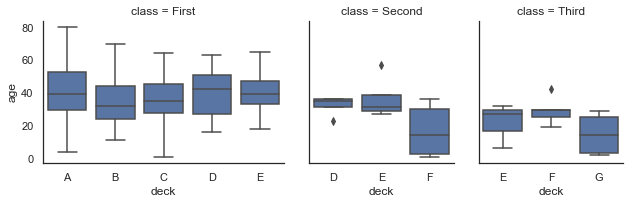

In [55]:
#  boxplot of the age distribution on each deck by class using FacetGrid
titanic = df.assign(deck=df.deck.astype(object)).sort_values("deck")
g = sns.FacetGrid(titanic, col="class", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "deck", "age")